In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

In [67]:
df.shape

(1000, 11)

In [68]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [70]:
df["Base_Fare"].value_counts()

Base_Fare
3.94    10
2.80     8
2.32     8
3.88     8
4.90     7
        ..
2.54     1
3.98     1
2.01     1
3.04     1
2.67     1
Name: count, Length: 290, dtype: int64

In [71]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [ ]:
out = (df.groupby("Day_of_Week", as_index=False)
         .agg(Total_Km=("Trip_Distance_km", "sum"),
              Total_Minutes=("Trip_Duration_Minutes", "sum"),
              Total_Price=("Trip_Price", "sum"))
         .sort_values(["Day_of_Week"]))
  
display(out)

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x ='Time_of_Day', y = 'Trip_Distance_km', data = df, palette = "YlGn", hue = 'Time_of_Day', legend = False)
plt.xlabel('Time of Day')
plt.ylabel('Trip Distance (Km)');

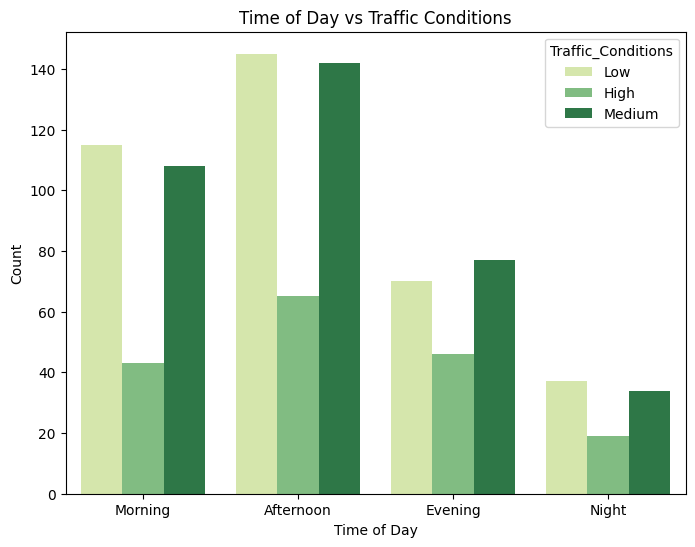

In [104]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Time_of_Day', hue='Traffic_Conditions', data=df, palette="YlGn")
plt.title('Time of Day vs Traffic Conditions')
plt.xlabel('Time of Day')
plt.ylabel('Count');

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x ='Time_of_Day', y = 'Trip_Price', data = df, palette = "YlGn", hue = 'Time_of_Day', legend = False)
plt.xlabel('Time of Day')
plt.ylabel('Trip Price');

In [ ]:
ax = df.groupby(["Time_of_Day","Traffic_Conditions"])["Passenger_Count"].mean().plot(kind="barh")
ax.invert_yaxis()